<a href="https://colab.research.google.com/github/maggieliuzzi/reinforcement_learning/blob/master/explore_exploit_dilemma/OptimisticInitialValues.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Optimistic initial value already handles exploration (higher means more exploration)

In [0]:
from __future__ import print_function, division  # sudo pip install -U future
from builtins import range
import matplotlib.pyplot as plt
import numpy as np

In [0]:
NUM_TRIALS = 10000
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]

In [0]:
class Bandit:
  def __init__(self, p):
    self.p = p  # win rate (real probability distribution)
    self.p_estimate = 10.  # max: 1 (Bernoulli)  # optimistic initial value
    self.N = 1  # so that p_estimate = 10 isn't lost

  def pull(self):
    return np.random.random() < self.p  # draw a 1 with probability p

  def update(self, x):
    self.N += 1
    self.p_estimate = ((self.N-1)*self.p_estimate + x) / self.N

In [0]:
bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]

rewards = np.zeros(NUM_TRIALS)

In [15]:
for i in range(NUM_TRIALS):
  # use optimistic initial values to select the next bandit
  print("Bandits: E(p): ", [b.p_estimate for b in bandits], ", chosen: ", np.argmax([b.p_estimate for b in bandits]))  # TOTHINK: argmax returns first occurrence if multiple
  j = np.argmax([b.p_estimate for b in bandits])

  # pull the arm for the bandit with the largest sample
  x = bandits[j].pull()

  # update rewards log
  rewards[i] = x

  # update the distribution for the bandit whose arm we just pulled
  bandits[j].update(x)

Streaming output truncated to the last 5000 lines.
Bandits: E(p):  [0.7333333333333333, 0.75, 0.7593604533495252] , chosen:  2
Bandits: E(p):  [0.7333333333333333, 0.75, 0.7594091460946993] , chosen:  2
Bandits: E(p):  [0.7333333333333333, 0.75, 0.759457819138176] , chosen:  2
Bandits: E(p):  [0.7333333333333333, 0.75, 0.7593042071197419] , chosen:  2
Bandits: E(p):  [0.7333333333333333, 0.75, 0.7593528816986864] , chosen:  2
Bandits: E(p):  [0.7333333333333333, 0.75, 0.7594015365952294] , chosen:  2
Bandits: E(p):  [0.7333333333333333, 0.75, 0.7594501718213068] , chosen:  2
Bandits: E(p):  [0.7333333333333333, 0.75, 0.759498787388845] , chosen:  2
Bandits: E(p):  [0.7333333333333333, 0.75, 0.7595473833097606] , chosen:  2
Bandits: E(p):  [0.7333333333333333, 0.75, 0.7595959595959606] , chosen:  2
Bandits: E(p):  [0.7333333333333333, 0.75, 0.7596445162593426] , chosen:  2
Bandits: E(p):  [0.7333333333333333, 0.75, 0.7596930533117943] , chosen:  2
Bandits: E(p):  [0.7333333333333333, 0.

In [16]:
# print mean estimates for each bandit
for b in bandits:
  print("mean estimate:", b.p_estimate)  # once the suboptimal bandits get below ~7.5, they stop being selected and updated

# print total reward
print("total reward earned:", rewards.sum())
print("overall win rate:", rewards.sum() / NUM_TRIALS)
print("num times selected each bandit:", [b.N for b in bandits])

mean estimate: 0.7333333333333333
mean estimate: 0.75
mean estimate: 0.7544265593561388
total reward earned: 7516.0
overall win rate: 0.7516
num times selected each bandit: [15, 48, 9940]


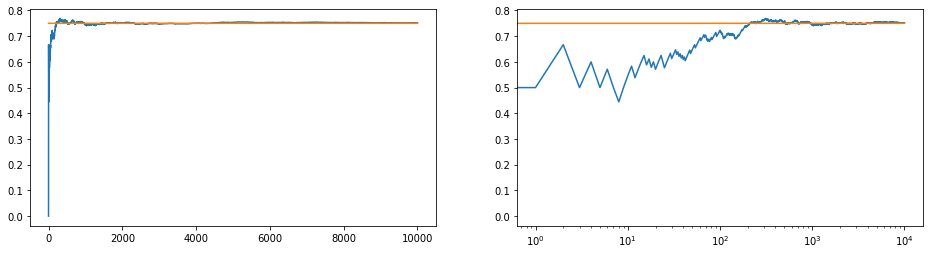

In [20]:
# plot the results
cumulative_rewards = np.cumsum(rewards)
win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)

plt.figure(figsize=(16, 4))
plt.subplot(1,2,1)
plt.plot(win_rates)
plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
plt.subplot(1,2,2)
plt.xscale('log')  # since it converges fast
plt.plot(win_rates)
plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
plt.show();